## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# from sklearn.linear_model import LogisticRegression #dont need
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

# from src.utils.pandas_extensions import one_hot_encoding

## Functions

In [31]:
def replace_known_zero(df: pd.DataFrame, column: str) -> None:
    df[column] = df[column].replace("none", 0)
    df[column] = df[column].replace("NaN", 0)
    # print(processed_data["Support Calls"].value_counts())
    df[column] = df[column].astype("float")

def clean_data(dataframe: pd.DataFrame, drop: bool = True) -> pd.DataFrame:
    # print(dataframe.info())
    processed_data = dataframe.copy() 

    processed_data = one_hot_encoding(processed_data, "Subscription Type")
    processed_data = one_hot_encoding(processed_data, "Contract Length")

    replace_known_zero(processed_data, column="Support Calls")
    replace_known_zero(processed_data, column="Payment Delay")

    if drop:
        processed_data = processed_data.dropna()

    return processed_data

def one_hot_encoding(dataframe: pd.DataFrame, column: str) -> pd.DataFrame:
    if (column not in dataframe.columns):
        raise AssertionError(f"Column {column} doesn't exist")
    
    nparr = dataframe[column].value_counts()
    
    for new_col in nparr.index:
        new_series = dataframe[column] == new_col
        dataframe[f"{column}_{new_col}"] = new_series

    return dataframe

In [ ]:
features = ["Usage Frequency", "Age", "Support Calls", "Last Interaction", "Payment Delay", "Total Spend", 
            "Subscription Type_Premium", "Subscription Type_Basic", "Subscription Type_Standard", 
            "Contract Length_Monthly", "Contract Length_Quarterly", "Contract Length_Annual"]

## Load data

In [38]:
unprocessed_data = pd.read_csv("../data/raw/train.csv")
unprocessed_data.head()
# unprocessed_data["Contract Length"].value_counts()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0


In [39]:
np.random.seed(311)
processed_data = clean_data(unprocessed_data)
# X = processed_data[features]
X = processed_data
y = processed_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
# print(unprocessed_data.head(n=20))
processed_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,...,Customer Status,Last Due Date,Last Payment Date,Churn,Subscription Type_Premium,Subscription Type_Standard,Subscription Type_Basic,Contract Length_Quarterly,Contract Length_Annual,Contract Length_Monthly
3,130847,24,Male,39.0,21,2.0,14.0,Standard,Quarterly,775.00,...,active,06-30,07-14,0,False,True,False,True,False,False
12,468959,30,Male,54.0,13,3.0,0.0,Basic,Quarterly,522.78,...,active,06-18,06-18,0,False,False,True,True,False,False
15,466346,43,Female,11.0,24,0.0,15.0,Premium,Quarterly,566.46,...,active,06-28,07-13,0,True,False,False,True,False,False
20,187564,40,Male,14.0,3,0.0,2.0,Basic,Quarterly,198.00,...,active,06-08,06-10,0,False,False,True,True,False,False
22,304125,61,Female,25.0,14,2.0,2.0,Premium,Monthly,427.00,...,active,06-22,06-24,0,True,False,False,False,False,True


In [40]:
#try ph with depth 1, ph with depth 4, ph with depth None
#try N as the features with the same depth value
#try cycle through the rest of the fa
# features = ["Usage Frequency", "Age", "Subscription Type_Premium", "Subscription Type_Basic", "Subscription Type_Standard"]
depth_limit = 16
model = DecisionTreeClassifier(criterion='entropy', max_depth=depth_limit)
model.fit(X_train[features], y_train)

#Predict on train data
y_pred_train = model.predict(X_train[features])

#Predict on test data
y_pred_test = model.predict(X_test[features])

train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
train_f1_score = metrics.f1_score(y_train, y_pred_train)
train_auc_score = metrics.roc_auc_score(y_train, y_pred_train)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_test)
testing_f1_score = metrics.f1_score(y_test, y_pred_test)
testing_auc_score = metrics.roc_auc_score(y_test, y_pred_test)

print("---------Training performance---------")
print(f"{train_accuracy=}")
print(f"{train_f1_score=}")
print(f"{train_auc_score=}")
print("---------Testing performance---------")
print(f"{testing_accuracy=}")
print(f"{testing_f1_score=}")
print(f"{testing_auc_score=}")

KeyError: "['Total SpendSubscription Type_Premium'] not in index"

In [ ]:
plt.figure(figsize=(3,3))
plot_tree(model, feature_names=features, filled=True)
plt.title(f"Descision Tree ({features=}, {depth_limit=})")

[0.06307342 0.11379088 0.13435581 0.05193066 0.56594903 0.00799837
 0.00921857 0.00540311 0.03466364 0.00780224 0.00581427] ['Usage Frequency', 'Age', 'Support Calls', 'Last Interaction', 'Payment Delay', 'Subscription Type_Premium', 'Subscription Type_Basic', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly', 'Contract Length_Annual']
11 11


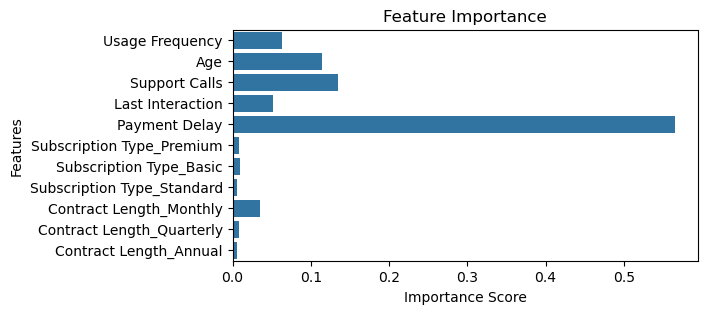

In [36]:
importances = model.feature_importances_
print(importances, features)
print(len(importances), len(features))

# Display feature importance
plt.figure(figsize=(6,3))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')          
plt.show()

## Export

In [29]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data["Support Calls"].value_counts()
test_data = clean_data(test_data, drop=False)
test_prob = model.predict_proba(test_data[features])
test_pred = test_prob[:,1]

In [30]:
export = test_data[["CustomerID"]]
export["Churn"] = test_pred

date = datetime.now()
export.to_csv("../data/processed/export" + str(date).replace(":", "") + ".csv", index=False)

C:\Users\Scott\AppData\Local\Temp\ipykernel_41856\1555304509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export["Churn"] = test_pred
